# Product-Sales-Outlet-at-BigMart-Datawarehouse-

he data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.




# Data Loading and Import modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
# Importing dataset and examining it

Test_data = pd.read_csv("/content/Test.csv", encoding="latin-1")
Train_data = pd.read_csv("/content/Train.csv", encoding="latin-1")
data = pd.concat([Test_data, Train_data], ignore_index=True) # linking (put together) the dataser Test and Train
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


# Data Understanding

Data
We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

Variable - Description

Item_Identifier- Unique product ID

Item_Weight- Weight of product

Item_Fat_Content - Whether the product is low fat or not

Item_Visibility - The % of total display area of all products in a store allocated to the particular product

Item_Type - The category to which the product belongs

Item_MRP - Maximum Retail Price (list price) of the product

Outlet_Identifier - Unique store ID

Outlet_Establishment_Year- The year in which store was established

Outlet_Size - The size of the store in terms of ground area covered

Outlet_Location_Type- The type of city in which the store is located

Outlet_Type- Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales - Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [4]:
#checking the unique values
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
dtype: int64

In [5]:
#checking the data type
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB
None


In [6]:
#checking only the categore object 
Categore = []
for x in data.dtypes.index:
    if data.dtypes[x] == "object":
      Categore.append(x)
Categore

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [7]:
#checking only the categore float64 
Num = []
for x in data.dtypes.index:
    if data.dtypes[x] == "float64":
      Num.append(x)
Num

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

In [8]:
#Checking the statistical information
print (data.describe())

        Item_Weight  Item_Visibility      Item_MRP  Outlet_Establishment_Year  \
count  11765.000000     14204.000000  14204.000000               14204.000000   
mean      12.792854         0.065953    141.004977                1997.830681   
std        4.652502         0.051459     62.086938                   8.371664   
min        4.555000         0.000000     31.290000                1985.000000   
25%        8.710000         0.027036     94.012000                1987.000000   
50%       12.600000         0.054021    142.247000                1999.000000   
75%       16.750000         0.094037    185.855600                2004.000000   
max       21.350000         0.328391    266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


In [9]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


In [10]:
#checking missing values  ITem_weight contains 2439 missing values, Outlet_Size contains 4016 missing values and Item_Outlet_Sales 5681 missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

# Cleaning Data

In [11]:
#Removing columns that I do not need 
Categore.remove('Item_Identifier')
Categore.remove('Outlet_Identifier')
Categore

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [12]:
# check categorical variables Item_Fat_Content
data.Item_Fat_Content.value_counts()



Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [13]:
# check categorical variables Item_Type
data.Item_Type.value_counts()


Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [14]:
# check categorical variables Outlet_Size
data.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [15]:
# check categorical variables Outlet_Location_Type
data.Outlet_Location_Type.value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [16]:
# check categorical variables Outlet_Type
data.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [17]:
data.Item_Weight.value_counts()

17.600    135
12.150    127
10.500    123
13.650    115
11.800    113
         ... 
6.765       7
4.555       7
7.850       6
9.035       6
4.615       6
Name: Item_Weight, Length: 415, dtype: int64

In [18]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat','low fat': 'Low Fat', 'reg': 'Regular'})
data['Item_Fat_Content'].head(5)

0    Low Fat
1    Regular
2    Low Fat
3    Low Fat
4    Regular
Name: Item_Fat_Content, dtype: object

In [19]:
data.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

Fill The missing values

For categorical variable object we have to mode

For categorical variable numerical we have to mean

In [20]:
# average weight per item
item_av_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
item_av_weight.head()
# create a mask of the missing data in Item_Weight
null_mask_weight = data['Item_Weight'].isnull()
# impute values
data.loc[null_mask_weight, 'Item_Weight'] = data.loc[null_mask_weight, 'Item_Identifier'].apply(lambda x: item_av_weight.loc[x])

In [21]:
#data['Outlet_Size']=data['Outlet_Size'].fillna('Unknown')  fill the date if you dont know the information, but u can also do a calculation using mode

o_s_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
o_s_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [22]:
fill_miss = data['Outlet_Size'].isnull()
data.loc[fill_miss, 'Outlet_Size'] = data.loc[fill_miss, 'Outlet_Type'].apply(lambda x: o_s_mode[x])

In [23]:
# average weight per item
Item_Outlet_Sales_av = data.pivot_table(values='Item_Outlet_Sales', index='Item_Identifier')
Item_Outlet_Sales_av.head()
# create a mask of the missing data in Item_Weight
null_mask_sales = data['Item_Outlet_Sales'].isnull()
# impute values
data.loc[null_mask_sales, 'Item_Outlet_Sales'] = data.loc[null_mask_sales, 'Item_Identifier'].apply(lambda x: Item_Outlet_Sales_av.loc[x])

In [24]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [25]:
sum(data['Item_Visibility']==0)

879

In [26]:
# replace zeros with mean
data.loc[:, 'Item_Visibility'].replace([0], [data['Item_Visibility'].mean()], inplace=True)

In [27]:
sum(data['Item_Visibility']==0)

0

In [28]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1693.795200
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,1453.663333
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store,4470.580680
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,1658.951667
4,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,3448.844000


In [29]:
# create new attributes using the object Item_Identifier

data['New_Item_Type'] = data['Item_Identifier'].apply(lambda x: x[:2]) # using lambda to get the first 2 letter from Item_Identifier
data['New_Item_Type']  


0        FD
1        FD
2        NC
3        FD
4        FD
         ..
14199    FD
14200    FD
14201    NC
14202    FD
14203    DR
Name: New_Item_Type, Length: 14204, dtype: object

In [30]:
# combine item fat content
data ['New_Item_Type'] = data['New_Item_Type'].replace({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
data['New_Item_Type'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: New_Item_Type, dtype: int64

In [31]:
# create small values for year
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'] 

0        14
1         6
2        15
3         6
4        28
         ..
14199    26
14200    11
14201     9
14202     4
14203    16
Name: Outlet_Years, Length: 14204, dtype: int64

In [32]:
data.loc[data['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Not Food'
data['Item_Fat_Content'].value_counts()

Low Fat     6499
Regular     5019
Not Food    2686
Name: Item_Fat_Content, dtype: int64

# Data Analysis

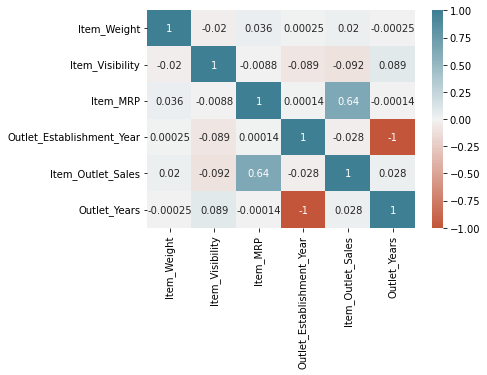

In [33]:
# Showing the corretaion between variables

# Positive correlation between the variables 'Item_MRP' and 'Item_Outlet_Sales'.
# Negative correlation between the variables 'Outlet_Years' from 'Oulet_Establishment_Year'
corr = data.corr()
sns.heatmap(corr, annot=True, cmap= sns.diverging_palette(20, 220, n=200),)

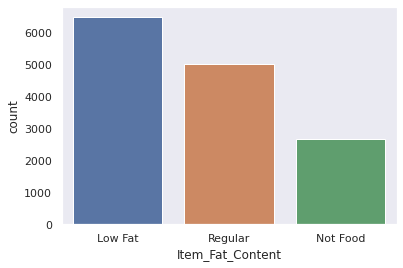

In [34]:
sns.set_theme(style="dark")
sns.countplot(data["Item_Fat_Content"])

#We can see that most things are low-fat substance.

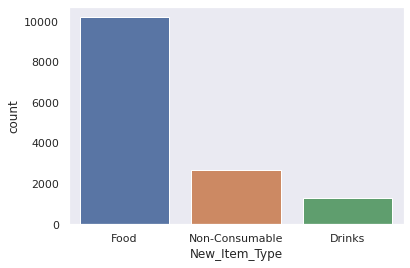

In [35]:
sns.set_theme(style="dark")
sns.countplot(data["New_Item_Type"])
#We can see that most things are Food substance.

[Text(0, 0, 'Snack Foods'),
 Text(0, 0, 'Dairy'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Fruits and Vegetables'),
 Text(0, 0, 'Baking Goods'),
 Text(0, 0, 'Health and Hygiene'),
 Text(0, 0, 'Breads'),
 Text(0, 0, 'Hard Drinks'),
 Text(0, 0, 'Seafood'),
 Text(0, 0, 'Soft Drinks'),
 Text(0, 0, 'Household'),
 Text(0, 0, 'Frozen Foods'),
 Text(0, 0, 'Meat'),
 Text(0, 0, 'Canned'),
 Text(0, 0, 'Starchy Foods'),
 Text(0, 0, 'Breakfast')]

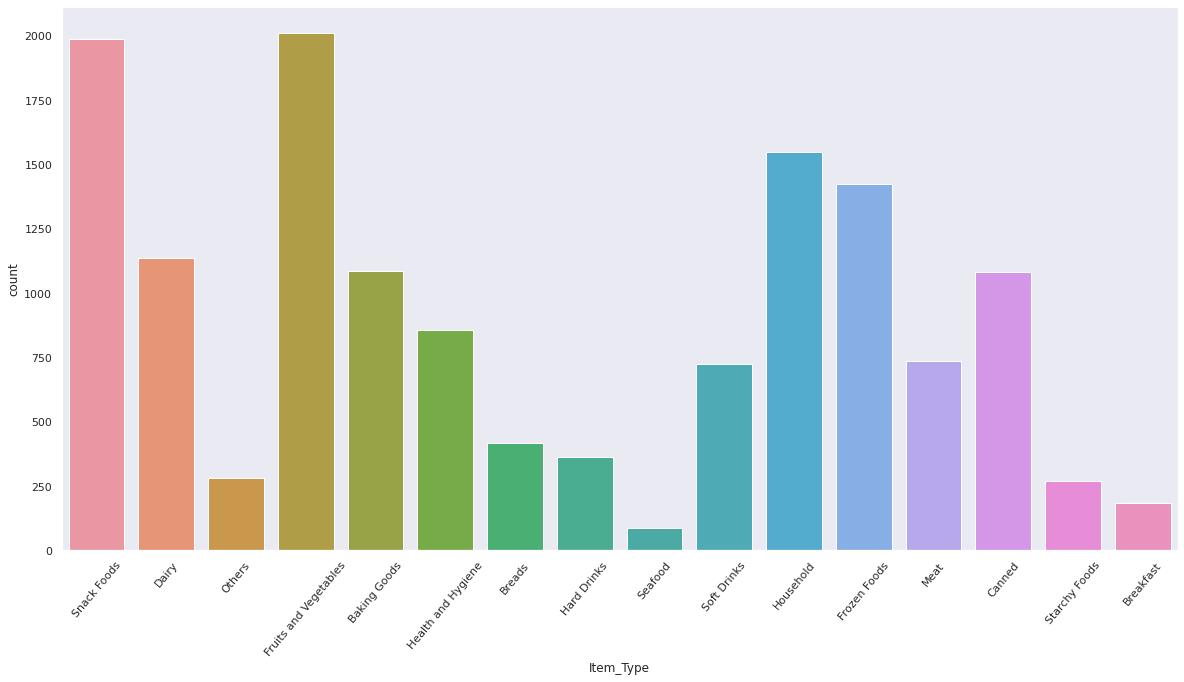

In [36]:
sns.set_theme(style="dark")
lista = list(data['Item_Type'].unique())
plt.figure(figsize = (20, 10))
chart=sns.countplot(data["Item_Type"])
chart.set_xticklabels(labels=lista, rotation=50)

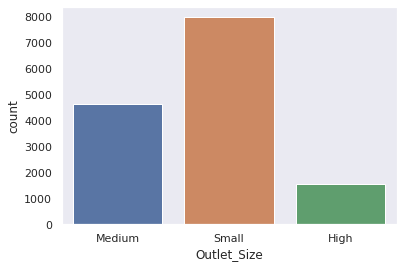

In [37]:
sns.set_theme(style="dark")
sns.countplot(data["Outlet_Size"])

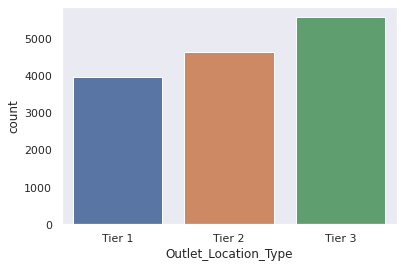

In [38]:
sns.set_theme(style="dark")
sns.countplot(data["Outlet_Location_Type"])


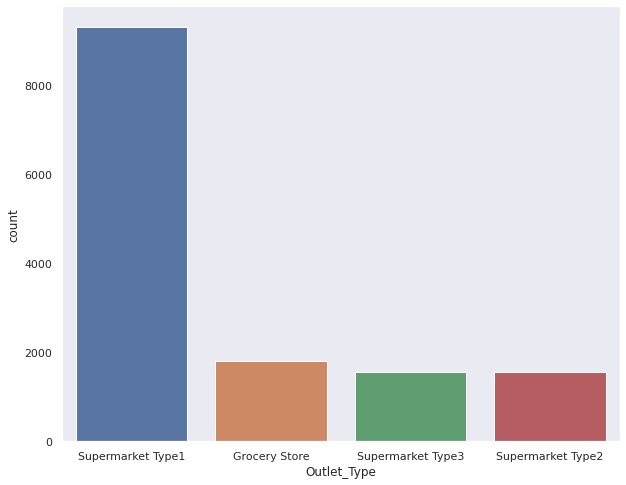

In [39]:
sns.set_theme(style="dark")
plt.figure(figsize = (10, 8))
sns.countplot(data["Outlet_Type"])
 

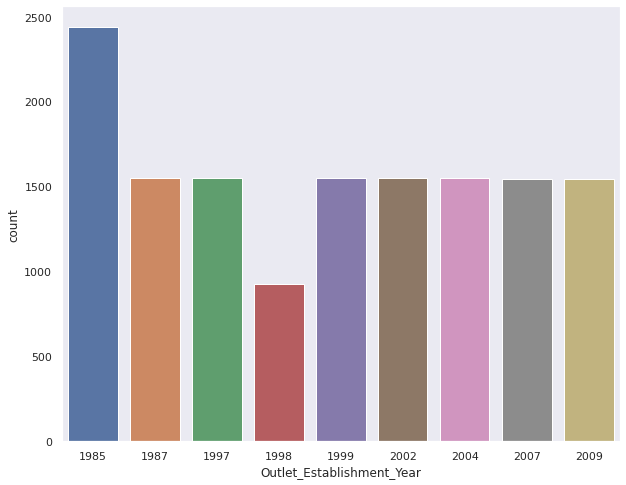

In [40]:
sns.set_theme(style="dark")
plt.figure(figsize = (10, 8))
sns.countplot(data['Outlet_Establishment_Year'])

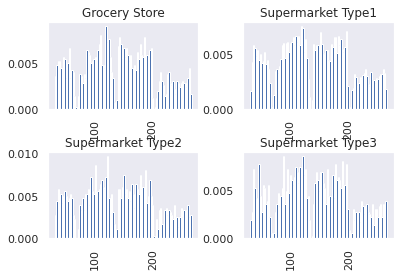

In [41]:
ax = data.hist(column='Item_MRP' , by='Outlet_Type', bins=100, density=True)

# Model 

to do a model I need to convert the categorical column into the numerical column.

In [42]:
# to do a model I need to convert the categorical column into the numerical column.
from sklearn.preprocessing import LabelEncoder

l = LabelEncoder()
data['Outlet'] = l.fit_transform(data['Outlet_Identifier'])
catego = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for colu in catego:
    data[colu] = l.fit_transform(data[colu])

In [43]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,FDW58,20.750,0,0.007565,13,107.8622,OUT049,1999,1,0,1,1693.795200,1,14,9
1,FDW14,8.300,2,0.038428,4,87.3198,OUT017,2007,2,1,1,1453.663333,1,6,2
2,NCN55,14.600,1,0.099575,11,241.7538,OUT010,1998,2,2,0,4470.580680,2,15,0
3,FDQ58,7.315,0,0.015388,13,155.0340,OUT017,2007,2,1,1,1658.951667,1,6,2
4,FDY38,13.600,2,0.118599,4,234.2300,OUT027,1985,1,2,3,3448.844000,1,28,5


In [44]:
#Splitting the data for Training and Testing
X = data.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = data['Item_Outlet_Sales']

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def train(modelo, X, y):
    # train the model
    modelo.fit(X, y)
    
    # predict the training set
    predit = modelo.predict(X)
    
    # perform cross-validation
    cross_validation_score = cross_val_score(modelo, X, y, scoring='neg_mean_squared_error', cv=5)
    cross_validation_score  = np.abs(np.mean(cross_validation_score ))
    
    # X contains input attributes and y contains the output attribute. We use 'cross val score()' for better validation of the model.

    #Here, cv=5 means that the cross-validation will split the data into 5 parts. 

    #np.abs() will convert the negative score to positive and np.mean() will give the average value of 5 scores.
    
    print("Model Report")
    print("MSE:",mean_squared_error(y,predit))
    print("cross validation score :", cross_validation_score )   

# Linear Regression

Model Report
MSE: 1181078.375694381
CV Score: 1268328.6846006806


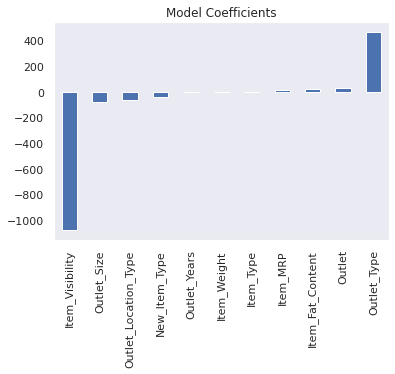

In [51]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

modelo = LinearRegression(normalize=True)
train(modelo, X, y)
amount = pd.Series(modelo.coef_, X.columns).sort_values()
amount.plot(kind='bar', title="Model Coefficients")

# Lasso


Model Report
MSE: 1181544.9116770895
CV Score: 1268829.2641386332


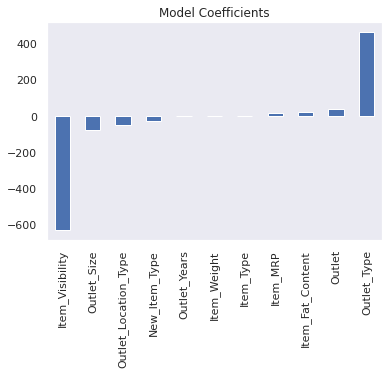

In [53]:
from sklearn.linear_model import Lasso

modelo = Lasso(alpha=0.01, normalize=True)
train(modelo, X, y)

# visualise result
amount = pd.Series(modelo.coef_, X.columns).sort_values()
amount.plot(kind='bar', title='Model Coefficients')

# Decision Tree Regressor

Model Report
MSE: 4.115174775009535e-28
CV Score: 2153116.695532842


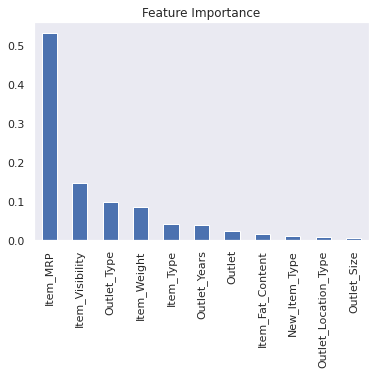

In [49]:
from sklearn.tree import DecisionTreeRegressor

modelo = DecisionTreeRegressor()
train(modelo, X, y)
amount = pd.Series(modelo.feature_importances_, X.columns).sort_values(ascending=False)
amount.plot(kind='bar', title="Feature Importance")

# Random Forest Regressor

Model Report
MSE: 150219.70102408036
CV Score: 1222067.1668521482


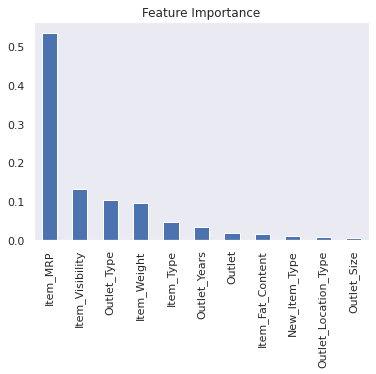

In [55]:
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor()
train(modelo, X, y)
amount = pd.Series(modelo.feature_importances_, X.columns).sort_values(ascending=False)
amount.plot(kind='bar', title="Feature Importance")

# Ridge

Model Report
MSE: 1445669.250989447
CV Score: 1491538.1318718444


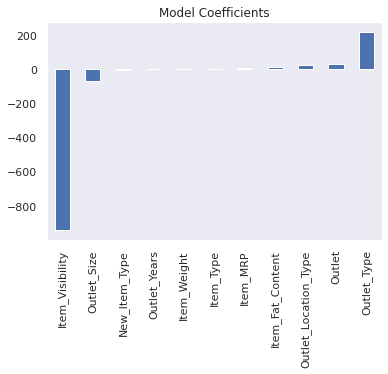

In [54]:
modelo = Ridge(normalize=True)
train(modelo, X, y)
amount = pd.Series(modelo.coef_, X.columns).sort_values()
amount.plot(kind='bar', title="Model Coefficients")